# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 7

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash;  30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 20 баллов


-----

In [2]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from tqdm import tqdm

## Задача 1

Проверьте, отличается ли средний балл студентов курса Phystech@DataScience за лекгкую часть задания 3 и 5 весной 2023.

Данные возьмите из [таблицы оценок](https://docs.google.com/spreadsheets/d/1GSw2_vAMQ4XZcAf8Y_99CkJ1oi4_LrHyWIS-DCdFE0Y/edit?usp=sharing). Не забудьте визуализировать данные с помощью ядерной оценки плотности (вам поможет функция `sns.kdeplot`) и оценить сдвиг.



In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1GSw2_vAMQ4XZcAf8Y_99CkJ1oi4_LrHyWIS-DCdFE0Y/gviz/tq?tqx=out:csv&gid=447882928', decimal=',')
df

,Unnamed: 0,Задание 1 Сумма Л,Задание 2 Сумма Л,Сумма С,Контест,Задание 3 Сумма Л,Сумма С.1,Задание 4 Сумма Л,Сумма С.2,Задание 5 Сумма Л,...,Сумма С.7,Задание 10 Сумма Л,Сумма С.8,Задание 11 Сумма Л,Сумма С.9,Задание 12 Сумма Л,Сумма С.10,Unnamed: 25,Сумма Л,Сумма С.11
0,Максимум,60.0,70.0,15.0,50.0,85.0,85.0,50.0,50.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.0,290.0
1,Агапов Егор,59.5,38.0,15.0,NaN,74.0,35.0,48.0,48.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304.5,163.0
2,Алексеев Даниил,60.0,65.0,15.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0,15.0
3,Алехин Юрий,60.0,58.0,15.0,NaN,72.0,15.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,30.0
4,Алямовская Анна,45.0,54.0,0.0,NaN,50.0,0.0,43.0,0.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Шлыков Николай,56.0,48.0,12.0,NaN,43.0,25.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,37.0
166,Шмаков Владимир,55.0,66.0,15.0,NaN,53.0,28.0,22.0,13.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.0,56.0
167,Щербаков Артём,45.0,62.5,15.0,NaN,65.0,55.0,39.0,42.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.5,152.0
168,Юнкина Валерия,60.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,0.0


In [4]:
data = df[["Задание 3 Сумма Л", "Задание 5 Сумма Л"]].iloc[2:,:].astype(float)
data

,Задание 3 Сумма Л,Задание 5 Сумма Л
2,0.0,0.0
3,72.0,0.0
4,50.0,27.0
5,0.0,0.0
6,0.0,0.0
...,...,...
165,43.0,0.0
166,53.0,50.0
167,65.0,67.0
168,0.0,0.0


In [5]:
res = sps.ttest_rel(data["Задание 3 Сумма Л"], data["Задание 5 Сумма Л"])
res

TtestResult(statistic=3.5903695458960847, pvalue=0.0004338297212469927, df=167)

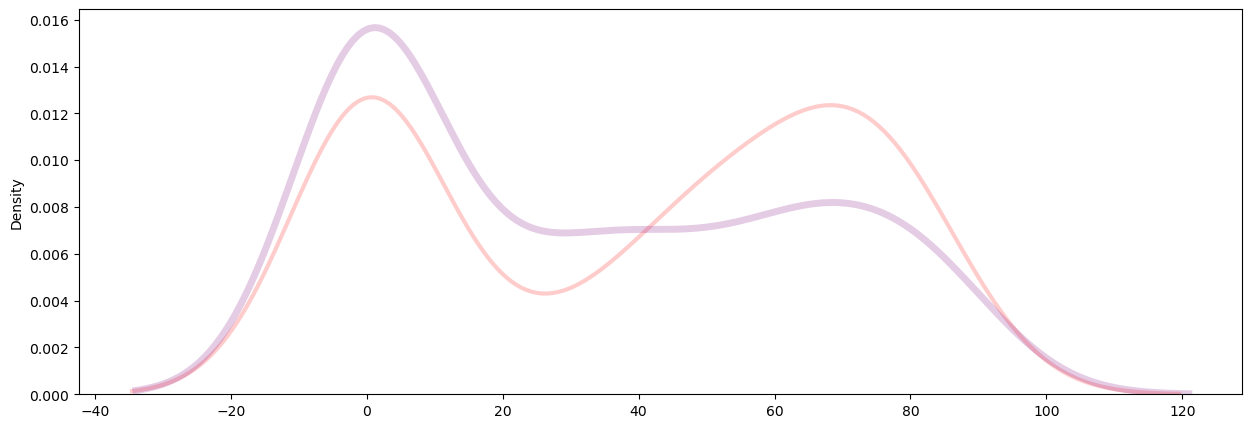

In [6]:
plt.figure(figsize=(15, 5))

sns.kdeplot(data = data["Задание 3 Сумма Л"], lw=3, color='red', alpha = 0.2)
sns.kdeplot(data = data["Задание 5 Сумма Л"], lw=5, color='purple', alpha = 0.2)

plt.xlabel("")
plt.show()

In [10]:
mean_3 = data["Задание 3 Сумма Л"].mean()
size_3 = len(data["Задание 3 Сумма Л"])

mean_5 = data["Задание 5 Сумма Л"].mean()
size_5 = len(data["Задание 5 Сумма Л"])

S_3 = (data["Задание 3 Сумма Л"]**2).mean() - mean_3**2
S_5 = (data["Задание 5 Сумма Л"]**2).mean() - mean_5**2

alpha = 0.05
z = sps.norm.ppf(1 - alpha/2)

dov_int = (mean_3 - mean_5 - z*np.sqrt(S_3/size_3 + S_5/size_5), 
           mean_3 - mean_5 + z*np.sqrt(S_3/size_3 + S_5/size_5))
np.array(dov_int) - (mean_3 - mean_5)

array([-6.78117647,  6.78117647])

In [11]:
#или так...
dov_int = sps.ttest_rel(data["Задание 3 Сумма Л"], data["Задание 5 Сумма Л"]).confidence_interval(confidence_level=(1-alpha/2))
np.array(dov_int) - (mean_3 - mean_5)

array([-4.70220696,  4.70220696])

Сделайте общий вывод по задаче.

**Вывод:** pvalue мал, гипотеза отвергается - бал отличается; задание 3 имеет больший средний бал по полученному графику, но поведение кривых схоже; сдвиг составляет 6.78117647 (or 4.70220696)

## Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Сделайте выводы.

In [62]:
df_1 = pd.read_csv('https://docs.google.com/spreadsheets/d/1dj_uiRV3q08ersUh-4bx_uVjEv3U-GLAZ9viyCSlXWQ/gviz/tq?tqx=out:csv&gid=1530323217')
df_2 = pd.read_csv('https://docs.google.com/spreadsheets/d/1dj_uiRV3q08ersUh-4bx_uVjEv3U-GLAZ9viyCSlXWQ/gviz/tq?tqx=out:csv&gid=0')
print(df_1)
print(df_2)

       №                     ФИО  \
0    NaN                     NaN   
1    1.0         Аксёнова Мария    
2    2.0     Богомолова Татьяна    
3    3.0        Васильев Сандал    
4    4.0      Дронова Елизавета    
5    5.0        Заречнев Сергей    
6    6.0          Зефирова Анна    
7    7.0     Зырянова Елизавета    
8    8.0      Калабашкин Сергей    
9    9.0         Кулаков Степан    
10  10.0     Курицина Екатерина    
11  11.0         Курков Василий    
12  12.0          Ланягин Игорь    
13  13.0   Лаптенкова Екатерина    
14   NaN      b07-900@inbicst.ru   
15   NaN  Ссылка на презентации:   

                                      Л.р 1-й семестр Unnamed: 3 Unnamed: 4  \
0                                                   1          2          3   
1                                                   +          +          +   
2                                                   +          +          +   
3                                                   +          +       

In [63]:
df_2 = df_2.drop(labels = [0,10,16,17],axis = 0)
df_2

,№,ФИО,Л.р 1-й семестр,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,зачет,Л.р 2-й семестр,Unnamed: 10,Unnamed: 11,Unnamed: 12,Курсовой проект,оценка,итог
1,1.0,Авшалумов Михаил,+,+,+,+,2.0,3.0,9.0,+,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Анпилов Алексей,+,+,+,+,3.0,3.0,10.0,+,+,+,+,NaN,NaN,NaN
3,3.0,Балыков Максим,+,+,+,+,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Волков Александр,+,+,+,+,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,Захарова Анна,+,+,+,+,3.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,Лавриненко Ирина,+,+,+,+,3.0,2.0,9.0,+,+,+,NaN,NaN,NaN,NaN
7,7.0,Меркулова Татьяна,+,+,+,+,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,Михайлова Анастасия,+,+,+,+,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,Михневич Роман,+,+,+,+,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,11.0,Панфилова Валерия,+,+,+,+,NaN,3.0,7.0,+,NaN,NaN,NaN,БД домашней библиотеки,NaN,NaN


In [64]:
df_1 = df_1.drop(labels = [0,14,15],axis = 0)
df_1

,№,ФИО,Л.р 1-й семестр,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,зачет,Л.р 2-й семестр,Unnamed: 10,Unnamed: 11,Unnamed: 12,Доклад (к/п),оценка,итог
1,1.0,Аксёнова Мария,+,+,+,+,2.0,2.0,8.0,+,NaN,NaN,NaN,Полнотекстовое индексирование,NaN,NaN
2,2.0,Богомолова Татьяна,+,+,+,+,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Васильев Сандал,+,+,+,+,3.0,1.0,8.0,NaN,NaN,NaN,NaN,Потоковые БД,NaN,NaN
4,4.0,Дронова Елизавета,+,+,+,+,3.0,3.0,10.0,NaN,NaN,NaN,NaN,Организация хранилищ данных,NaN,NaN
5,5.0,Заречнев Сергей,+,+,+,+,3.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,Зефирова Анна,+,+,+,+,2.0,2.0,8.0,+,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,Зырянова Елизавета,+,+,+,+,3.0,1.0,8.0,NaN,NaN,NaN,NaN,Составные типы PL/SQL,10.0,NaN
8,8.0,Калабашкин Сергей,+,+,+,+,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,Кулаков Степан,+,+,+,+,1.0,NaN,5.0,NaN,NaN,NaN,NaN,СУБД ЛИНТЕР: основные возможности и особенности,NaN,NaN
10,10.0,Курицина Екатерина,+,+,+,+,2.0,3.0,9.0,NaN,NaN,NaN,NaN,SciDB,NaN,NaN


In [65]:
data_1 = df_1[["зачет"]].astype(float)
data_2 = df_2[["зачет"]].astype(float)
print(data_1)
print(data_2)

    зачет
1     8.0
2     5.0
3     8.0
4    10.0
5     8.0
6     8.0
7     8.0
8    10.0
9     5.0
10    9.0
11    4.0
12    5.0
13    8.0
    зачет
1     9.0
2    10.0
3     5.0
4     5.0
5     8.0
6     9.0
7     6.0
8     5.0
9     6.0
11    7.0
12    6.0
13    9.0
14    6.0
15    5.0


In [68]:
sps.ttest_ind(data_1["зачет"], data_2["зачет"], equal_var=False)

Ttest_indResult(statistic=0.7238740443073193, pvalue=0.4760710748427852)

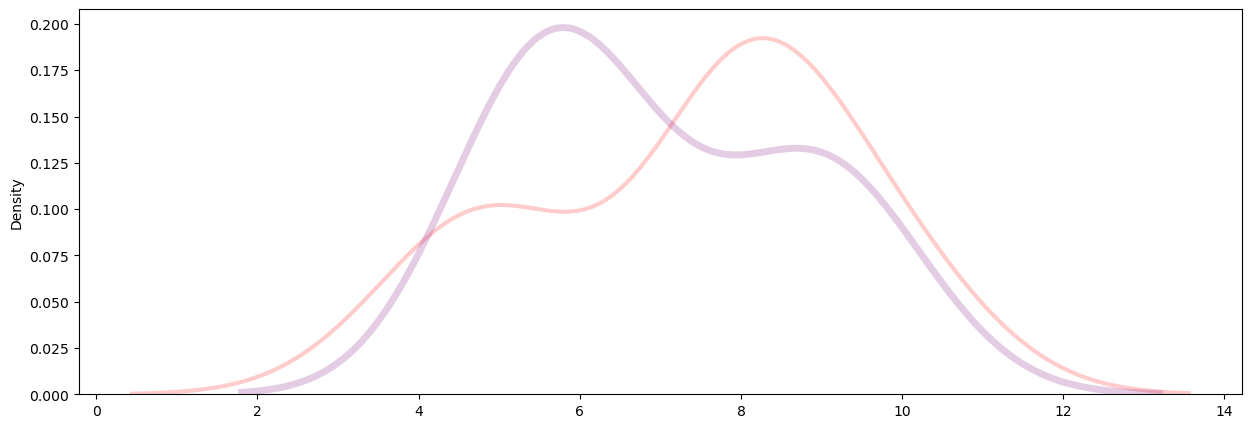

In [19]:
plt.figure(figsize=(15, 5))

sns.kdeplot(data = data_1["зачет"], lw=3, color='red', alpha = 0.2)
sns.kdeplot(data = data_2["зачет"], lw=5, color='purple', alpha = 0.2)

plt.xlabel("")
plt.show()

**Вывод:** pvalue больше 0.05, гипотезу не можем отвергнуть; поведение графиков разное

## Задача 3

#### Профиль физика

Скачайте [данные](https://www.kaggle.com/datasets/naharrison/particle-identification-from-detector-responses?resource=download) моделирования неупругого рассеяния протонов и электронов. В датасете представлены 4 разных вида частиц (частицы одного вида имеют одинаковый id).

In [55]:
path = "pid-5M.csv"
data = pd.read_csv(path)
idd = data['id'].unique()

[ 211 2212  321  -11]


Постройте гистограммы признаков для каждого вида частиц.

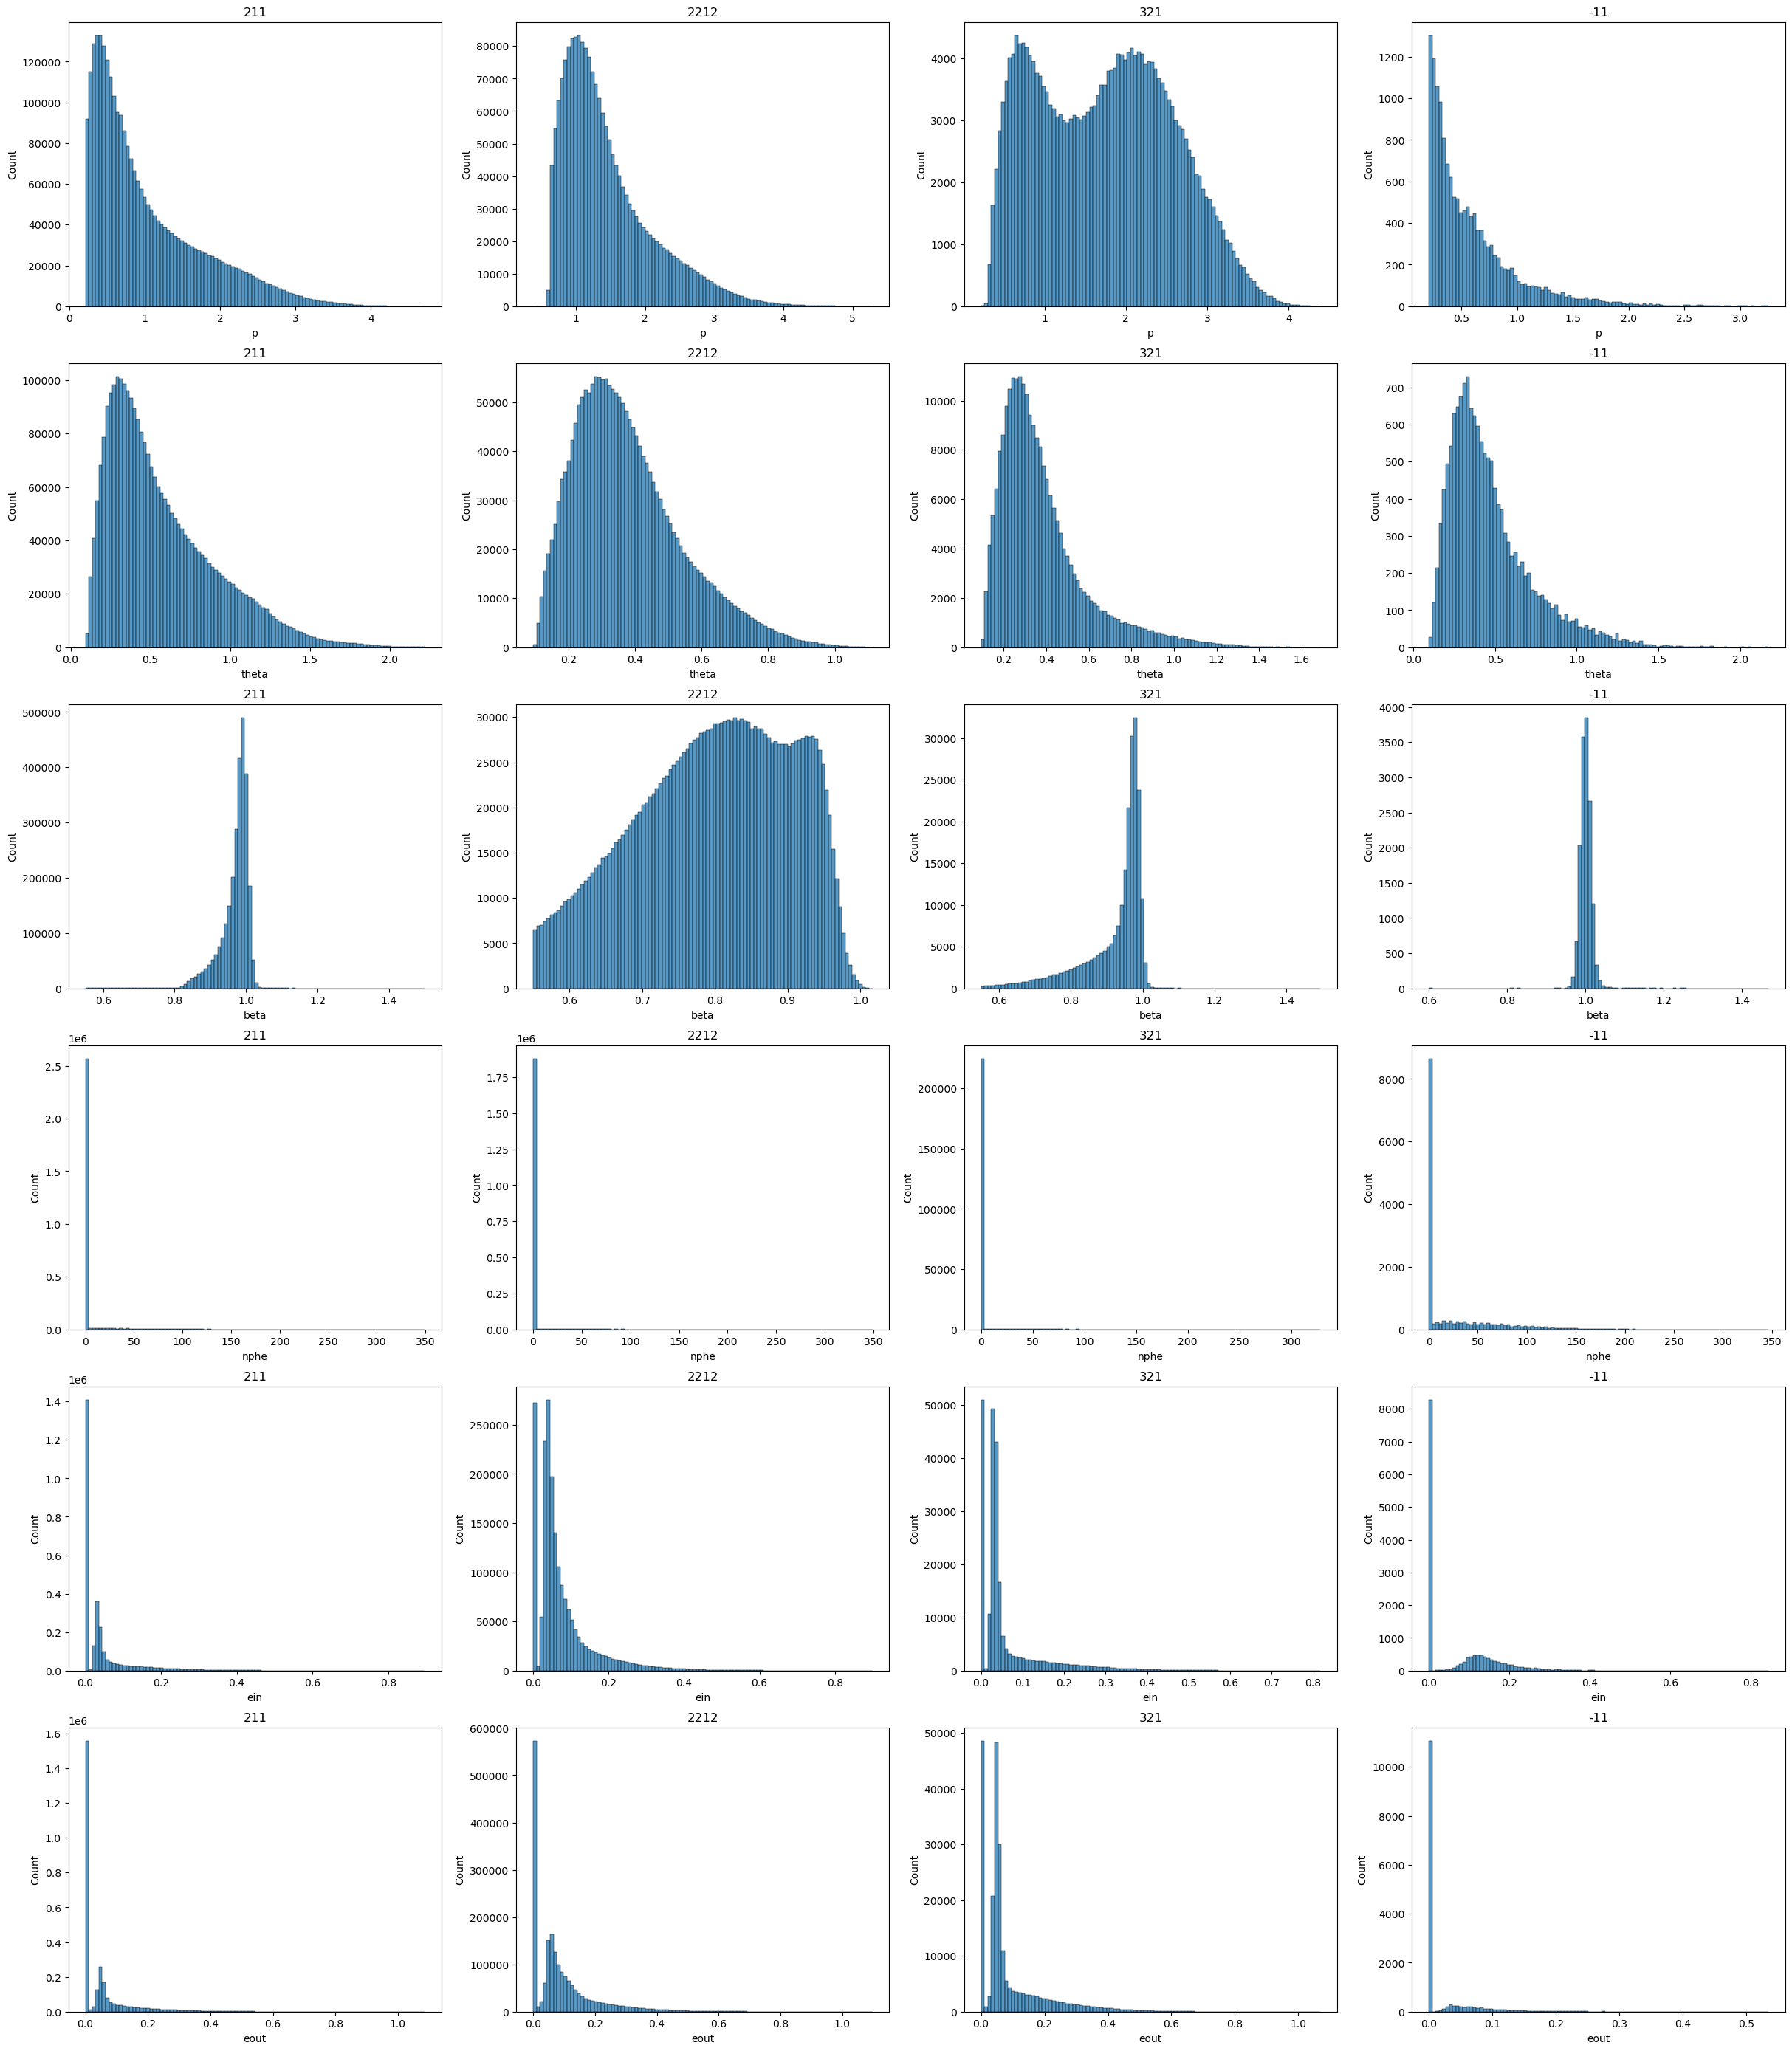

In [60]:
fig, ax = plt.subplots(6, 4, figsize=(30, 35))
for i, h in zip(np.arange(6),data.columns[1:]): 
    for j, idd in zip(np.arange(4),data['id'].unique()):
        sns.histplot(data= data[h].loc[data["id"] == idd], bins = 100, ax=ax[i][j])
        ax[i][j].set_title(idd)

Для каждой частицы посчитайте среднее значение для каждой колонки с помощью `data.groupby`

In [61]:
data.groupby(['id']).mean()

,p,theta,beta,nphe,ein,eout
id,,,,,,
-11,0.591886,0.471277,1.001011,26.177948,0.068000,0.021495
211,1.035184,0.574035,0.968695,4.636706,0.042600,0.052250
321,1.744734,0.381561,0.921961,2.001605,0.060969,0.088638
2212,1.454526,0.379136,0.796434,2.059655,0.075566,0.094600


Для частиц и признаков с похожими средними значениями с помощью критерия Стьюдента проверьте гипотезу о равенстве средних. Не забудьте о МПГ.

Также посчитайте реализацию доверительного интервала величины сдвига. Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?


In [78]:
#для p
res1 = sps.ttest_ind(data["p"].loc[data["id"] == 321], data["p"].loc[data["id"] == 2212], equal_var=False)
res2 = sps.ttest_ind(data["p"].loc[data["id"] == 211], data["p"].loc[data["id"] == 2212], equal_var=False)
# для theta
res3 = sps.ttest_ind(data["theta"].loc[data["id"] == 321], data["theta"].loc[data["id"] == 2212], equal_var=False)
res4 = sps.ttest_ind(data["theta"].loc[data["id"] == -11], data["theta"].loc[data["id"] == 211], equal_var=False)
res4

Ttest_indResult(statistic=-48.618588933646194, pvalue=0.0)

#не уловила смысл(

**Ответ:** доверительные интервалы показывают степень достоверности полученного результата при проверке гипотезы; 

Сделайте вывод, по каким измерениям частицы тяжелее/проще всего различить.

**Вывод:** <...>

## Задача 4
Пусть $X=(X_1, ..., X_n)$ и $Y=(Y_1, ..., Y_n)$ — независимые выборки *одинакового* размера.

Выведите сходимость статистики:
- абсолютного t-test'а с помощью дельта-метода
- относительного t-test'а с помощью дельта-метода